# Exercise sheet 9
**Hello everyone!**

**Points: 15**

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [Piazza](https://piazza.com/class/leibdr4lk8n3w4), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids23).

Please submit this exercise sheet on **GRADESCOPE**.
Naming conventions:
* Name of notebook: "09-exercise-pids2023.ipynb"

Your notebook will be automatically graded using gradescope. To get graded, you need to upload the file *09-exercise-pids2023.ipynb* to gradescope. If you are using JupyterHub, make sure you have saved the current notebook, then you can download this file by following: *File*->*Download* and save the file on you computer.

The sheet is released before the exercise session on Tuesday. You have until the next exercise session on Tuesday to submit this sheet. Most of the questions of the exercise sheet can be handle during the session.

**Handout date**: 02.05.2023 <br>
**Submission date**: 09.05.2023 <br>

### Please name the variables as suggested! Be careful with the type! Otherwise the grading system will fail you!

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

In [37]:
import otter
grader = otter.Notebook()

# More uncertainty and confidence intervals!
Throughout this notebook, we will steadily increase our understanding of confidence intervals. While there are more mathematical notations than usual, they are included solely to enhance the clarity of the exercises. You won't need to run difficult computations other than empirical mean and empirical standard deviation.


# Question 1: Titanic dataset
We are working with a dataset containing information about passengers of the sadly famous Titanic. We will see how we can use tools from the lecture to get a sense of what factors are important to increase our probability of survival during a shipwreck.<br>

In the first part, we will load the dataset, and plot a few values to see which parameters might be important. In a second part, we will focus on one particular feature and see if it is trustworthy.

### 1a (1 point): 
We first load the dataset. If you are working locally, you should be able to load the dataset from the csv file named 'train.csv', in the same location as this current file.

In [38]:
data_source = "https://raw.githubusercontent.com/paulhendricks/titanic/master/inst/data-raw/train.csv"
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### 1b (1 point):
Create a variable ***data_class_survived*** and ***data_class_not_survived*** that contains only the passengers that survived and the passagengers that didn't survive, respectively. Here, we will only keep the *Pclass* and *Survived* columns from the dataset. 

In [40]:
data_class = data[['Survived','Pclass']]
data_class_survived = data_class[data_class['Survived'] == True]
data_class_not_survived = data_class[data_class['Survived'] == False]
data_class

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [41]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

### 1c (1 point): 
Make a normalized histogram showing the class (column 'Pclass') of the passengers that survived.<br>
On the same plot, display the same histogram for the passengers that did not survive.<br>
Hint: you can use plt.hist and the density parameter.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 1c        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 1      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

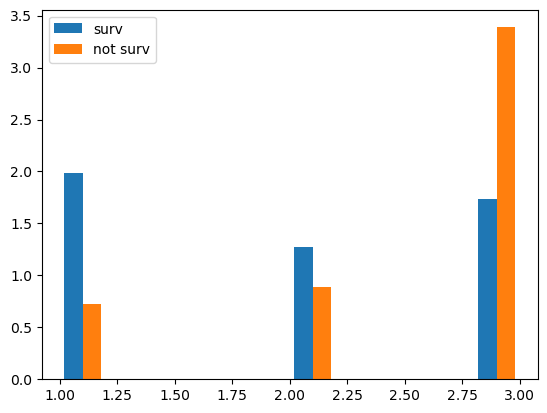

In [42]:
plt.hist([data_class_survived['Pclass'], data_class_not_survived['Pclass']], density=True)
plt.legend(['surv', 'not surv'])

<!-- END QUESTION -->



### 1d (1 point):
Similar to 1c), display the 'Fare' of passengers survived in a histogram.<br>
On the same plot, display the same histogram for the passengers that did not survive. <br>
In order to do so, create data frames for the information in column 'Fare' as you did in 1b.


<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 1d        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 1      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

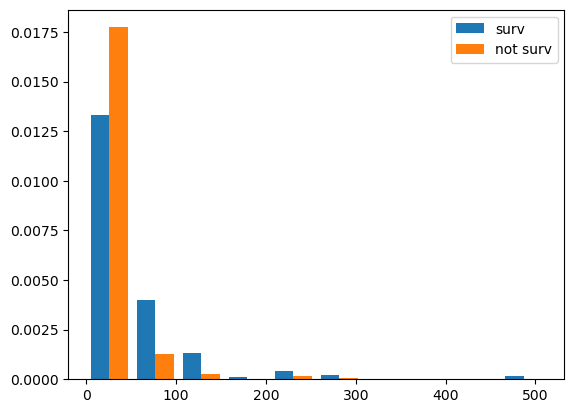

In [43]:
data_fare = data[['Survived', 'Fare']]
data_fare_survived = data_fare[data_fare['Survived'] == True]
data_fare_not_survived = data_fare[data_fare['Survived'] == False]
plt.hist([data_fare_survived['Fare'], data_fare_not_survived['Fare']], density=True)
plt.legend(['surv', 'not surv'])

<!-- END QUESTION -->



### 1e (2 points):
Create variables ***data_age_survived*** and ***data_age_not_survived*** to extract passengers that survived and passengers that did not.<br>
Among the passengers that survived, display ages of the passengers in a histogram. Make sure that the histogram is *normalized*<br>
On the same plot, display the same normalized histogram for the passengers that didn't survive.<br>
Hint: you can use plt.hist.

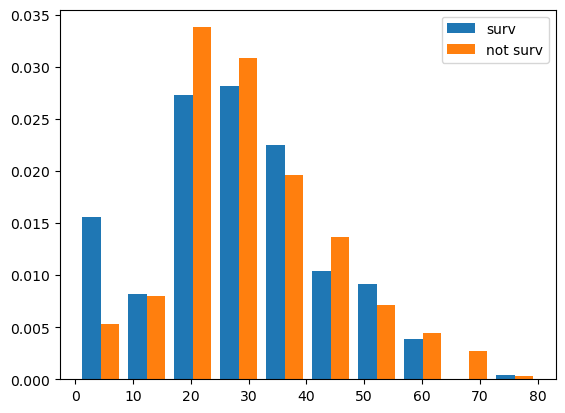

In [44]:
data_age = data[['Age', 'Survived']]
data_age_survived = data_age[data_age['Survived'] == True]
data_age_not_survived = data_age[data_age['Survived'] == False]

plt.hist([data_age_survived['Age'], data_age_not_survived['Age']], density=True)
plt.legend(['surv', 'not surv'])

In [45]:
grader.check("Question 1e")

Question 1e results: All test cases passed!

### 1f (2 points): 
Display on the same plot, the column 'Survived' for the female and male passengers. <br>
Hint: you can use plt.hist.<br>
Among the passengers, compute the proportion of survivors that are women and store it in ***surv_female***.<br>
Among the passengers, compute the proportion of survivors that are men and store it in ***surv_male***.

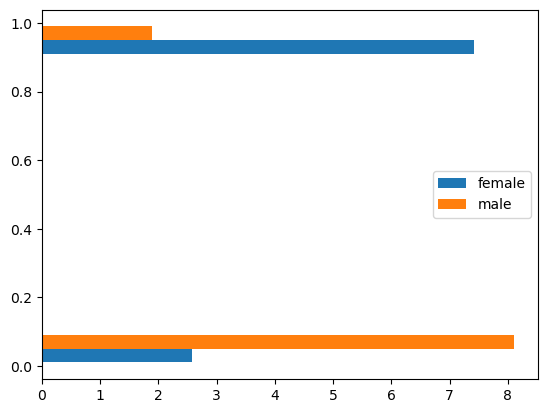

In [46]:
data_surv = data[['Survived', 'Sex']]
surv_female_ = data_surv[data_surv['Sex'] == 'female']
surv_male_ = data_surv[data_surv['Sex'] == 'male']

plt.hist([surv_female_['Survived'], surv_male_['Survived']], orientation='horizontal', label=['female', 'male'], density=True)
plt.legend()

surv_female = surv_female_[surv_female_['Survived'] == True].shape[0] / data_surv.shape[0]
surv_male = surv_male_[surv_male_['Survived'] == True].shape[0] / data_surv.shape[0]

## Will your sex increase or decrease your probability of survival?

Let $(X_i)_{i\leq N_X} \overset{i.i.d.}{\sim} \mathrm{Ber}(p_X)$ denote $N_X$ Bernoulli random variables that model the outcome of a female passenger on the Titanic. <br>
Let $(Y_i)_{i\leq N_Y} \overset{i.i.d.}{\sim} \mathrm{Ber}(p_Y)$ denote $N_Y$ Bernoulli random variables that model the outcome of a male passenger on the Titanic.<br>

We aim at estimating the probailty of survival $p_X$ and $p_Y$.

Ideally we would like to get the values $p_X = \mathbb{E}[X_i]$ and $p_Y = \mathbb{E}[Y_i]$. Unfortunately, we only have access to the $N_X$ realizations $(X_i)$ and $N_Y$ realization $(Y_i)$. <br>

### 1g (1 point):
Use the law of large numbers to create an estimate $\hat p_X$ of $p_X$ and an estimate $\hat p_Y$ of $p_Y$. Name these estimators ***pX_hat*** and ***pY_hat***.

In [47]:
pX_hat = surv_female_[surv_female_['Survived'] == True].shape[0] / surv_female_.shape[0]
pY_hat = surv_male_[surv_male_['Survived'] == True].shape[0] / surv_male_.shape[0]

In [48]:
grader.check("Question 1g")

Question 1g results: All test cases passed!

Let's do some math.<br>
We have some estimate for $p_X$ and $p_Y$, but we would like to know if we can trust them. <br>

Let's first focus on $p_X$. <br>
We want to compute the probability $p_{trust X}$ that we can trust our estimate for $p_X$:
$$ p_{trust X} = \mathbb{P}\left( p_X-0.05 \leq \hat X \leq p_X + 0.05 \right). $$

Based the central limit theorem, we'll make the assumption that $\hat p_X \sim \mathcal{N}(p_X, \sigma^2/N_X)$.<br>
Then, following slides of week 8, we have
$$ p_{trust X} = \mathbb{P}\left( Z \leq 0.05\sqrt{ \frac{N_X}{p_X(1-p_X)}} \right)-\mathbb{P}\left( Z \leq -0.05\sqrt{ \frac{N_X}{p_X(1-p_X)}} \right), $$
where $Z\sim \mathcal{N}(0,1)$. <br>
As mentioned during the lecture, we don't know $p_X(1-p_X)$. Let's replace this term by $\hat p_X(1-\hat p_X)$.


### 1h (2 points):

Compute the value 
$$ p1 = \mathbb{P}\left( Z \leq 0.05\sqrt{ \frac{N_X}{\hat p_X(1-\hat p_X)}} \right)$$
and 
$$ p2 = \mathbb{P}\left( Z \leq -0.05\sqrt{ \frac{N_X}{\hat p_X(1-\hat p_X)}} \right).$$
Store these values in variables named $p1$ and $p2$.<br>
Hint: you can have access to the cumulative distribution function (cdf) of a Gaussian random variable by using the function *norm* (for normal) from the library *scipy.stats* (already imported).

In [49]:
N_X = surv_female_.shape[0]
p1 = norm.cdf(0.05*np.sqrt(N_X/(pX_hat*(1-pX_hat))))
p2 = norm.cdf(-0.05*np.sqrt(N_X/(pX_hat*(1-pX_hat))))
print(p1, p2)

0.978570861003359 0.02142913899664103


In [50]:
grader.check("Question 1h")

Question 1h results: All test cases passed!

### 1i (1 point): 
Based on the previous assumptions, what is the probability that $\hat p_X \in [p_X - 0.05, p_X+0.05]$? Store your answer in a variable named ***proba_trust_X***.

In [51]:
proba_trust_X = p1 - p2
print(proba_trust_X)

0.957141722006718


In [52]:
grader.check("Question 1i")

Question 1i results: All test cases passed!

### 1j (1 point): 
Using a similar approach, compute the probability that $\hat p_Y \in [p_Y - 0.05, p_Y+0.05]$? Store your answer in a variable named ***proba_trust_Y***.

In [53]:
N_Y = surv_male_.shape[0]
p1_ = norm.cdf(0.05*np.sqrt(N_Y/(pY_hat*(1-pY_hat))))
p2_ = norm.cdf(-0.05*np.sqrt(N_Y/(pY_hat*(1-pY_hat))))
proba_trust_Y = p1_ - p2_
print(proba_trust_Y)

0.9978471824002983


In [54]:
grader.check("Question 1j")

Question 1j results: All test cases passed!

# What about the children?
Should we remove the children in the previous analysis about the sex? If we do so, the number of women drop from 314 to 259. And we have seen in the lecture that the lower the number of sample, the worse is the confidence interval. 
<br>
But anyway, let's finish by checking that children have a very high probability of survival.

### 1k (2 points): 
Compute the probability of survival of a child (age<18) and store it in ***proba_surv_child***.

In [55]:
data_child = data[data['Age'] < 18]
proba_surv_child = data_child[data_child['Survived'] == True].shape[0] / data_child.shape[0]
print(proba_surv_child)

0.5398230088495575


In [56]:
grader.check("Question 1k")

Question 1k results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [57]:
grader.check_all()

Question 1a results: All test cases passed!

Question 1b results: All test cases passed!

Question 1e results: All test cases passed!

Question 1f results: All test cases passed!

Question 1g results: All test cases passed!

Question 1h results: All test cases passed!

Question 1i results: All test cases passed!

Question 1j results: All test cases passed!

Question 1k results: All test cases passed!